In [1]:
from vega_datasets import data
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [2]:
df = data.sf_temps()

In [3]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


Resample by the day and take the average temperature. Visualize the average temperature over time.

In [4]:
import pandas as pd

In [5]:
df.date = pd.to_datetime(df.date)


In [6]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [7]:
df = df.set_index('date').sort_index()


In [8]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    8759 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


In [10]:
df.shape

(8759, 1)

In [11]:
df.resample('D').mean() 


,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


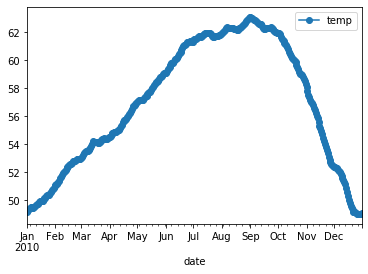

In [12]:
df.resample('D').mean().plot(marker='o')


Write the code necessary to visualize the minimum temperature over time.


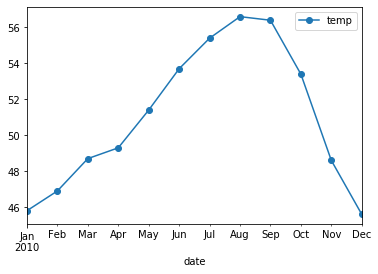

In [13]:
df.resample('M').min().plot(marker='o')


Write the code necessary to visualize the maximum temperature over time.


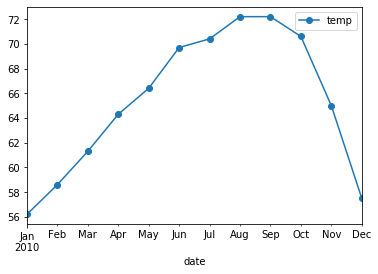

In [14]:
df.resample('M').max().plot(marker='o')


Which month is the coldest, on average?


In [15]:
df.resample('M').min().sort_values(by='temp')


,temp
date,
2010-12-31,45.6
2010-01-31,45.8
2010-02-28,46.9
2010-11-30,48.6
2010-03-31,48.7
2010-04-30,49.3
2010-05-31,51.4
2010-10-31,53.4
2010-06-30,53.7


In [16]:
#December is the coldest month

Which month has the highest average temperature?


In [17]:
df.resample('M').max().sort_values(by='temp', ascending=False)


,temp
date,
2010-08-31,72.2
2010-09-30,72.2
2010-10-31,70.6
2010-07-31,70.4
2010-06-30,69.7
2010-05-31,66.4
2010-11-30,65.0
2010-04-30,64.3
2010-03-31,61.3


In [18]:
#August is the hottest month

Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [19]:
new_df = df.resample('D').agg(['min','max'])

In [20]:
df_copy = df.copy()

In [21]:
df_copy.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [22]:
new_df['diff'] = new_df['temp']['max'] - new_df['temp']['min']

In [23]:
new_df.head()

temp       diff
             min   max     
date                       
2010-01-01  45.8  53.3  7.5
2010-01-02  46.0  53.4  7.4
2010-01-03  46.1  53.5  7.4
2010-01-04  46.1  53.6  7.5
2010-01-05  46.1  53.8  7.7

In [24]:
new_df.resample('M').max().sort_values(by='diff', ascending=False)

temp        diff
             min   max      
date                        
2010-08-31  57.2  72.2  15.0
2010-09-30  57.3  72.2  14.9
2010-06-30  55.3  69.7  14.8
2010-07-31  56.6  70.4  14.8
2010-10-31  56.3  70.6  14.4
2010-05-31  53.7  66.4  13.1
2010-04-30  51.3  64.3  13.0
2010-03-31  49.6  61.3  12.0
2010-11-30  53.2  65.0  11.8
2010-02-28  48.8  58.6   9.9
2010-01-31  47.0  56.2   9.3
2010-12-31  48.6  57.5   8.9

Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [25]:
plot_df = df.resample('D').agg(['mean','min','max'])

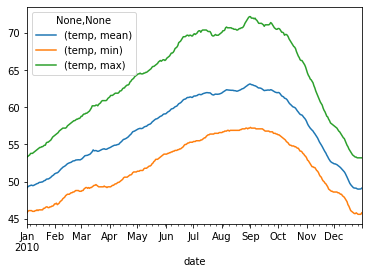

In [26]:
plot_df.plot()

In [27]:
from vega_datasets import data
data.seattle_weather()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


Which year and month combination has the highest amount of precipitation?

In [28]:
df = data.seattle_weather()

In [29]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [30]:
df.shape

(1461, 6)

In [31]:
new_df = df.copy()

In [32]:
newer_df = new_df[['date', 'precipitation']]

In [33]:
newer_df.head()

,date,precipitation
0,2012-01-01,0.0
1,2012-01-02,10.9
2,2012-01-03,0.8
3,2012-01-04,20.3
4,2012-01-05,1.3


In [34]:
newer_df.shape

(1461, 2)

In [35]:
newer_df = newer_df.set_index('date').sort_index()


In [36]:
newer_df.head()

,precipitation
date,
2012-01-01,0.0
2012-01-02,10.9
2012-01-03,0.8
2012-01-04,20.3
2012-01-05,1.3


In [37]:
newer_df.resample('M').sum().sort_values(by='precipitation', ascending=False)

,precipitation
date,
2015-12-31,284.5
2014-03-31,240.0
2015-11-30,212.6
2012-11-30,210.5
2012-03-31,183.0
2012-12-31,174.0
2012-01-31,173.3
2014-10-31,171.5
2012-10-31,170.3


In [38]:
#December of 2015 has the highest precipitation

In [39]:
newer_df = newer_df.resample('M').sum().sort_values(by='precipitation', ascending=False)

Visualize the amount of monthly precipitation over time.


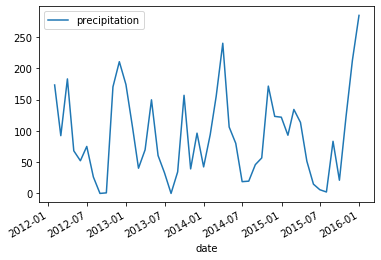

In [40]:
newer_df.plot()


Visualize the amount of wind over time. Choose a time interval you think is appropriate.


In [41]:
wind_df = new_df[['date', 'wind']]

In [42]:
wind_df = wind_df.set_index('date').sort_index()

In [43]:
 wind_df_plot = wind_df.resample('Y').sum()

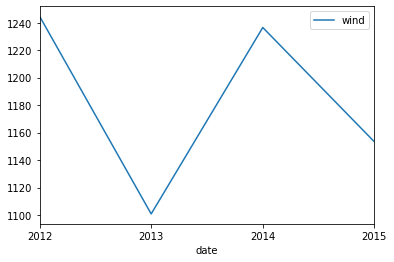

In [44]:
wind_df_plot.plot()

Which year-month combination is the windiest?


In [45]:
wind_df.resample('M').sum().sort_values(by='wind', ascending=False)

,wind
date,
2015-12-31,134.6
2012-03-31,131.7
2014-02-28,126.8
2012-01-31,120.9
2014-11-30,119.5
2012-12-31,118.8
2014-03-31,114.0
2012-02-29,113.2
2013-04-30,111.4


In [46]:
#December 2015 is the windiest

What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [47]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [48]:
weather_df = df[['date', 'weather']]

In [49]:
weather_df = weather_df.set_index('date').sort_index()

In [50]:
weather_df[weather_df.weather == 'sun'].resample('Y').agg('count')

,weather
date,
2012-12-31,118
2013-12-31,205
2014-12-31,211
2015-12-31,180


In [51]:
#2012 is the sunniest year

In [52]:
weather_df.head()

,weather
date,
2012-01-01,drizzle
2012-01-02,rain
2012-01-03,rain
2012-01-04,rain
2012-01-05,rain


In which month does it rain the most?


In [53]:
# weather_df[weather_df.weather == 'rain'].resample('M').count().resample('M').sum().sort_values(by='weather', ascending=False)

In [55]:
# weather_counts.resample('M').sum().sort_values(by='weather', ascending=False)

In [56]:
#Rains the most in Nov. of 2012

Which month has the most number of days with a non-zero amount of precipitation?


In [57]:
df.shape

(1461, 6)

In [58]:
new_df = df[['date', 'precipitation']]

In [59]:
new_df = new_df.set_index('date').sort_index()

In [60]:
new_df[new_df.precipitation > 0].resample('M').agg('count').sort_values(by='precipitation', ascending=False)

,precipitation
date,
2012-12-31,27
2015-12-31,25
2012-01-31,22
2012-03-31,22
2015-11-30,20
2014-03-31,20
2012-11-30,20
2014-02-28,19
2014-10-31,19


In [61]:
#December 2012 has the most days with a non-zero amount of precipitation

In [62]:
flights = data.flights_20k()


In [63]:
flights.shape

(20000, 5)

In [64]:
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


Convert any negative delays to 0.


In [65]:
delayed = flights[['date', 'delay']]

In [66]:
delayed = delayed.set_index('date').sort_index()

In [67]:
delayed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2001-01-01 00:01:00 to 2001-03-31 21:30:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   delay   20000 non-null  int64
dtypes: int64(1)
memory usage: 312.5 KB


In [68]:
delayed.loc[(delayed.delay < 0),'delay']= 0


In [69]:
delayed.head(10)

,delay
date,
2001-01-01 00:01:00,14
2001-01-01 06:20:00,0
2001-01-01 06:30:00,0
2001-01-01 07:00:00,0
2001-01-01 07:00:00,0
2001-01-01 07:05:00,0
2001-01-01 07:05:00,13
2001-01-01 07:15:00,24
2001-01-01 07:15:00,0


Which hour of the day has the highest average delay?


In [ ]:
# delayed.resample('H').mean().sort_values(by='delay', ascending=False)

In [ ]:
delayed['hours'] = flights.date.dt.hour

In [80]:
hour = flights.date.dt.hour

In [71]:
hours = pd.DataFrame(hours)

In [72]:
hours

,date
0,14
1,16
2,18
3,21
4,21
...,...
19995,15
19996,13
19997,11
19998,16


In [73]:
hours = hours.rename(columns={'date': 'hour'})

In [74]:
hours.head()

,hour
0,14
1,16
2,18
3,21
4,21


In [76]:
hr_time = hours.copy()

In [83]:
hr_time.shape

(20000, 1)

In [89]:
hr_time.head()

,hour
0,14
1,16
2,18
3,21
4,21


In [75]:
new_df = delayed.copy()

In [82]:
new_df.shape

(20000, 1)

In [84]:
new_df.head()

,delay
date,
2001-01-01 00:01:00,14
2001-01-01 06:20:00,0
2001-01-01 06:30:00,0
2001-01-01 07:00:00,0
2001-01-01 07:00:00,0


In [93]:
newest_df = pd.concat([flights, hr_time], axis=1)

In [94]:
newest_df.head()

,date,delay,distance,origin,destination,hour
0,2001-01-13 14:56:00,32,417,SAN,SJC,14
1,2001-01-31 16:40:00,-5,1093,FLL,ISP,16
2,2001-02-11 18:39:00,3,293,LBB,DAL,18
3,2001-01-10 21:00:00,-15,550,MSY,MCO,21
4,2001-03-30 21:45:00,-2,229,STL,IND,21


In [95]:
newest_df.head()

,date,delay,distance,origin,destination,hour
0,2001-01-13 14:56:00,32,417,SAN,SJC,14
1,2001-01-31 16:40:00,-5,1093,FLL,ISP,16
2,2001-02-11 18:39:00,3,293,LBB,DAL,18
3,2001-01-10 21:00:00,-15,550,MSY,MCO,21
4,2001-03-30 21:45:00,-2,229,STL,IND,21


In [98]:
highest_avg

distance
hour delay          
0    14        405.0
     61        405.0
     79        325.0
     89        325.0
     95        236.0
...              ...
23   158       462.0
     173       279.0
     178       453.0
     208       370.0
     213       453.0

[1963 rows x 1 columns]

In [100]:
df = newest_df.set_index('hour').sort_index()


In [101]:
df.head()

,date,delay,distance,origin,destination
hour,,,,,
0,2001-03-09 00:30:00,95,236,LAS,LAX
0,2001-01-12 00:12:00,132,1235,HOU,LAS
0,2001-02-15 00:01:00,163,192,HOU,SAT
0,2001-03-14 00:50:00,152,283,BWI,BDL
0,2001-01-01 00:01:00,14,405,MCI,MDW


In [102]:
df

,date,delay,distance,origin,destination
hour,,,,,
0,2001-03-09 00:30:00,95,236,LAS,LAX
0,2001-01-12 00:12:00,132,1235,HOU,LAS
0,2001-02-15 00:01:00,163,192,HOU,SAT
0,2001-03-14 00:50:00,152,283,BWI,BDL
0,2001-01-01 00:01:00,14,405,MCI,MDW
...,...,...,...,...,...
23,2001-02-09 23:45:00,79,304,PHX,SAN
23,2001-01-30 23:15:00,0,325,PHX,ONT
23,2001-01-26 23:30:00,141,256,PHX,LAS


In [106]:
df.groupby('hour').delay.mean().sort_values(ascending=False)

hour
3     302.500000
1     170.000000
0     127.916667
23     64.153846
22     31.200542
21     19.565832
20     15.605333
19     13.979508
18     11.584518
16     11.343851
15     10.841933
17     10.811625
13      8.819185
14      7.850689
12      6.218967
11      3.916328
10      2.183709
9       0.789649
8      -0.078067
6      -1.026749
7      -1.121298
5      -4.837838
Name: delay, dtype: float64

Does the day of the week make a difference in the delay amount?


In [110]:
import seaborn as sns

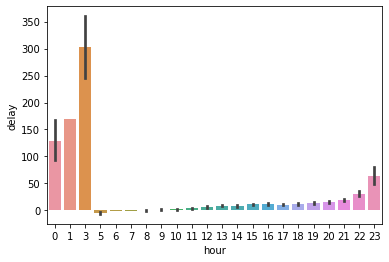

In [111]:
sns.barplot(data=newest_df, y='delay', x='hour')

Does day of week make a difference?

In [113]:
dow = flights.date.dt.dayofweek

In [114]:
dow = pd.DataFrame(dow)

In [118]:
dow = dow.rename(columns={'date': 'day'})

In [119]:
df = pd.concat([flights, dow], axis=1)

In [120]:
df.head()

,date,delay,distance,origin,destination,day
0,2001-01-13 14:56:00,32,417,SAN,SJC,5
1,2001-01-31 16:40:00,-5,1093,FLL,ISP,2
2,2001-02-11 18:39:00,3,293,LBB,DAL,6
3,2001-01-10 21:00:00,-15,550,MSY,MCO,2
4,2001-03-30 21:45:00,-2,229,STL,IND,4


In [123]:
df.groupby('day').delay.mean().sort_values(ascending=False)

day
4    15.594452
3    10.245766
2     8.161416
6     7.255164
1     6.198981
5     4.667520
0     3.595973
Name: delay, dtype: float64

In [124]:
#Yes there is a difference between day of week.

Does the month make a difference in the delay amount?


In [125]:
newest_df.head()

,date,delay,distance,origin,destination,hour
0,2001-01-13 14:56:00,32,417,SAN,SJC,14
1,2001-01-31 16:40:00,-5,1093,FLL,ISP,16
2,2001-02-11 18:39:00,3,293,LBB,DAL,18
3,2001-01-10 21:00:00,-15,550,MSY,MCO,21
4,2001-03-30 21:45:00,-2,229,STL,IND,21


In [126]:
newest_df = newest_df.set_index('date').sort_index()


In [127]:
newest_df = newest_df[['delay']]

In [128]:
newest_df.head()

,delay
date,
2001-01-01 00:01:00,14
2001-01-01 06:20:00,0
2001-01-01 06:30:00,-8
2001-01-01 07:00:00,-10
2001-01-01 07:00:00,0


In [129]:
newest_df.resample('M').mean().sort_values(by='delay', ascending=False)

,delay
date,
2001-02-28,9.398338
2001-01-31,8.242630
2001-03-31,6.804310


In [130]:
#Marginal difference between months

In [131]:
from vega_datasets import data
data.iowa_electricity()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883
5,2006-01-01,Fossil Fuels,37014
6,2007-01-01,Fossil Fuels,41389
7,2008-01-01,Fossil Fuels,42734
8,2009-01-01,Fossil Fuels,38620
9,2010-01-01,Fossil Fuels,42750
